In [1]:
import numpy as np
import io
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import random
import json

In [2]:
from recognition.test_model import image_recognizer as recongition
import segmentation.segmentation as segmentation

In [3]:
data = np.load("data/dataset_100.npy")

data_descriptions = None
with open("data/descriptions_100.json", 'r') as f:
    data_descriptions = json.load(f)

descriptions = data_descriptions["data"]

In [4]:
data_subset = data[0:2, :, :]
data_subset.shape

(2, 480, 640)

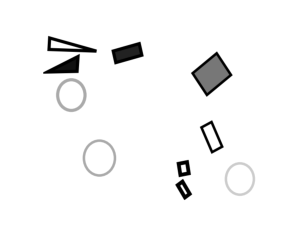

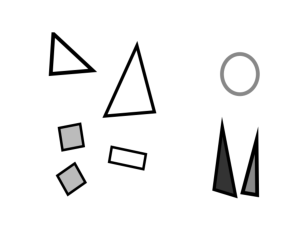

In [5]:
for i in range(2):
    current_data = data_subset[i]
    plt.axis("off")
    plt.imshow(current_data, cmap='gray', vmin=0, vmax=255)
    plt.show()

In [6]:
segmentation_result = segmentation.perform_segmentation(data_subset)

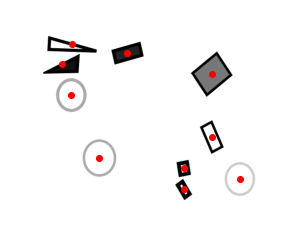

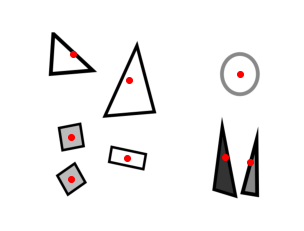

In [7]:
for i in range(2):
    current_data = data_subset[i]
    current_result = segmentation_result[i]

    plt.axis("off")
    plt.imshow(current_data, cmap='gray', vmin=0, vmax=255)

    for element in current_result:
        pos = element['center']
        plt.plot(pos[0], pos[1], 'ro')
        # plt.annotate("Point 1", (pos[0], pos[1]))

    plt.show()

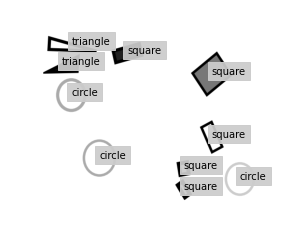

In [8]:
for i in range(2):
    current_data = data_subset[i]
    current_result = segmentation_result[i]

    plt.axis("off")
    plt.imshow(current_data, cmap='gray', vmin=0, vmax=255)

    for element in current_result:
        pos = element['center']

        cutout = element['data'].reshape((1, 50, 50))
        label = recongition().test_image(cutout)

        plt.annotate(label, (pos[0], pos[1]), backgroundcolor="#CCCE")

    plt.show()